<div style="
background-color:#6A0DAD;
color:white;
padding:14px;
border-radius:18px;
text-align:center;
font-size:190%;
font-family:Clibri;;
margin-bottom:20px;
">E-Commerce Customer Segmentation & Prediction  
<br>

</div>

<img src="E-Commerce_Customer_Segmentation_Title.png.png" width="100%">



<div style="
background-color:#6A0DAD;
color:white;
padding:14px;
border-radius:18px;
text-align:center;
font-size:190%;
font-family:Clibri;
margin-bottom:20px;
"><br>
<span style="font-size:80%;">INDEX</span>
</div>




<div style="
background-color:#F3E5F5;
color:#4A148C;
padding:20px;
border-radius:20px;
border:2px solid #8E24AA;
font-family:Calibri;
font-size:120%;
line-height:1.7;
">

<b>1. Load Dataset & Import Libraries</b><br>
&nbsp;&nbsp;1.1 Import Required Libraries<br>
&nbsp;&nbsp;1.2 Load the Dataset<br><br>

<b>2. Data Cleaning & Preprocessing</b><br>
&nbsp;&nbsp;2.1 Handle Missing Values<br>
&nbsp;&nbsp;2.2 Remove Duplicate Records<br>
&nbsp;&nbsp;2.3 Remove Cancelled & Invalid Transactions<br><br>

<b>3. Exploratory Data Analysis </b><br>
&nbsp;&nbsp;3.1 Missing Values Overview<br>
&nbsp;&nbsp;3.2 Quantity Distribution (Raw Data)<br><br>

<b>4. Exploratory Data Analysis (Cleaned Data)</b><br>
&nbsp;&nbsp;4.1 Univariate Analysis<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.1.1 Quantity Distribution<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.1.2 Unit Price Distribution<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.1.3 Unit Price Boxplot<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.1.4 Transaction Value (TotalPrice)<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.1.5 Customers per Country<br>
&nbsp;&nbsp;4.2 Bivariate Analysis<br><br>

<b>5. Feature Engineering (RFM Analysis)</b><br>
&nbsp;&nbsp;5.1 Reference Date Selection<br>
&nbsp;&nbsp;5.2 RFM Calculation (Recency, Frequency, Monetary)<br>
&nbsp;&nbsp;5.3 Scaling RFM Features<br><br>

<b>6. Customer Segmentation (Unsupervised Learning)</b><br>
&nbsp;&nbsp;6.1 K-Means Clustering<br>
&nbsp;&nbsp;6.2 Hierarchical Clustering<br>
&nbsp;&nbsp;6.3 DBSCAN<br>
&nbsp;&nbsp;6.4 Gaussian Mixture Model (GMM)<br>
&nbsp;&nbsp;6.5 Model Comparison & Final Clustering Selection<br><br>

<b>7. Target Variable Creation</b><br>
&nbsp;&nbsp;7.1 Customer Segment Label Creation<br><br>

<b>8. Supervised Learning – Data Preparation</b><br>
&nbsp;&nbsp;8.1 Feature and Target Definition<br>
&nbsp;&nbsp;8.2 Train–Test Split<br><br>

<b>9. Supervised Learning Models & Evaluation</b><br>
&nbsp;&nbsp;9.1 Logistic Regression<br>
&nbsp;&nbsp;9.2 Decision Tree Classifier<br>
&nbsp;&nbsp;9.3 Random Forest Classifier<br>
&nbsp;&nbsp;9.4 Gradient Boosting Classifier<br>
&nbsp;&nbsp;9.5 Supervised Model Comparison<br>
&nbsp;&nbsp;9.6 Artificial Neural Network (ANN – Deep Learning)<br><br>

<b>10. Final Model Selection & Freezing</b><br>
&nbsp;&nbsp;10.1 Final Clustering Model (K-Means)<br>
&nbsp;&nbsp;10.2 Final Prediction Model (Random Forest)<br>
&nbsp;&nbsp;10.3 Business Summary & Conclusion<br>

</div>


<a id="section1"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 1 | Load Dataset & Import Libraries
</p>




<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
1.1 Load the Dataset and Import Libraries
</h3>



In [12]:
import pandas as pd# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
                                     1.2 Load the dataset


In [13]:
Ecomm_data= pd.read_csv(r"C:\Users\jveda\Desktop\BIA\Capstone pro\E-commerce Customer Segmentation and Prediction\data.csv", encoding="latin1")
# this csv file not encoded in UTF-8 conatin speacial symbol so we use encodoing as latin 1

In [14]:
Ecomm_data.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [15]:
Ecomm_data.shape

(541909, 8)

<a id="section2"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 2 | Data Cleaning & Preprocessing
</p>



In [16]:
Ecomm_data.isnull().sum()# checking the null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
# here we got the count of null values in each col , description is the col that we not needed , 
# But the Customer id is the imp col for us cuz we build the model on it 

<h3 style="color:balck ; font-family:Clibri;text-align:center;;"> 
2.1Handle null values 

In [18]:
data=Ecomm_data.dropna(subset=['CustomerID'])
# Remove rows with missing CustomerID since customer identification is essential for segmentation


In [19]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
Ecomm_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
data.shape

(406829, 8)

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
2.2 Check for duplicates 

In [22]:
data.duplicated().sum()

np.int64(5225)

In [23]:
data= data.drop_duplicates()

In [24]:
data.duplicated().sum()# removed all the duplicates from the dataset

np.int64(0)

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
2.3 Remove cancelled & invalid Transactions.

In [25]:
data=data[~data['InvoiceNo'].astype(str).str.startswith('c')]#Removed Invoiceno starts with "c" that are cancelled  

In [26]:
data=data[(data['Quantity']>0)& (data['UnitPrice']>0)]# removed the Quantity and unitprice is negative 

In [27]:
data['InvoiceNo'].astype(str).str.startswith('C').sum()# Verified that the dataset contains no cancelled invoices, returns, or invalid pricing

np.int64(0)

In [28]:
(data['Quantity'] <= 0).sum()


np.int64(0)

In [29]:
data.to_csv("Cleaned_data.csv")# Save cleaned data for streamlit application

#### Completed data cleaning by handling missing values, removing duplicates,
#### and excluding cancelled or invalid transactions


<a id="section3"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 3 |EDA Exploratory Data Analysis - Raw Data
</p>

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
3.1 EDA on Raw data showing the Missing values overview

In [30]:
Ecomm_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
# Initial EDA on raw data to identify missing values and data quality issues


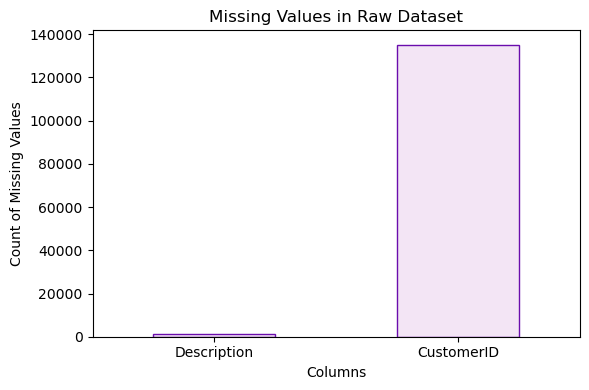

In [189]:
missing_count = Ecomm_data.isnull().sum()
missing_count=missing_count[missing_count>0]
plt.figure(figsize=(6,4))
missing_count.plot(kind='bar',color='#F3E5F5',
    edgecolor='#6A0DAD' )
plt.title("Missing Values in Raw Dataset")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation 
* The raw dataset contains substantial missing values in the CustomerID column, indicating the presence of anonymous transactions. As customer identification is crucial for segmentation, these records were removed during data preprocessing.

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
3.2 Quantity Distribution on Raw dataset 

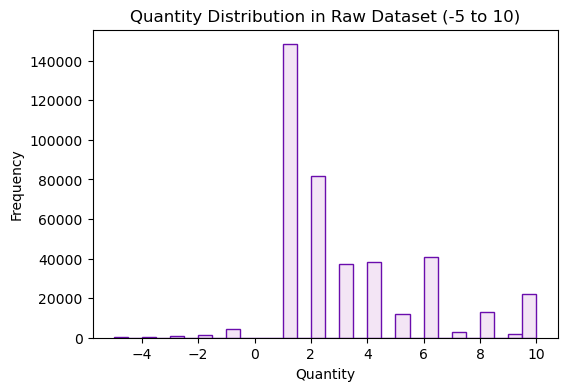

In [190]:
plt.figure(figsize=(6,4))
Ecomm_data[
    (Ecomm_data['Quantity'] >= -5) & (Ecomm_data['Quantity'] <= 10)
]['Quantity'].plot(kind='hist',color='#F3E5F5',
    edgecolor='#6A0DAD', bins=30)
plt.title("Quantity Distribution in Raw Dataset (-5 to 10)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


# Interpretation
* After limiting the quantity range between −5 and 10, the distribution shows that most transactions involve small positive quantities, which represent typical purchases. The presence of negative quantities indicates returned or cancelled transactions. This visualization highlights the skewness and irregularities in the raw data, reinforcing the need for data preprocessing before further analysis.

<a id="section4"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 4 | Exploratory Data Analysis (Cleaned Data)
</p>









<a id="section4"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 4 | EDA Cleaned Data
</p>




<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
4.1 Univarient 

### 4.1.1 Univariate  - Distribution of Quantity 

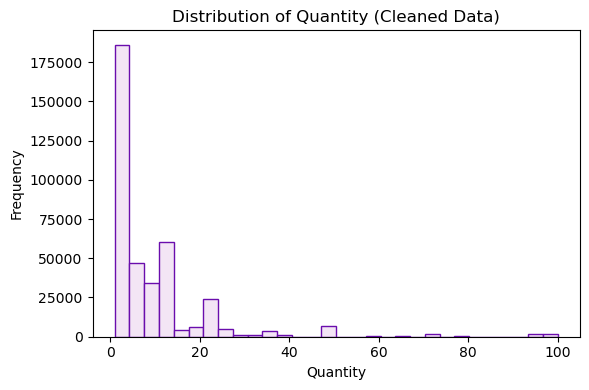

In [191]:
plt.figure(figsize=(6,4))
data[data['Quantity'] <= 100]['Quantity'].plot(kind='hist',color='#F3E5F5',
    edgecolor='#6A0DAD', bins=30)
plt.title("Distribution of Quantity (Cleaned Data)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Interpretation -
* The quantity distribution in the cleaned dataset shows that most purchases involve small quantities, indicating typical retail buying behavior. The right-skewed distribution suggests that while bulk purchases exist, they are relatively infrequent. The absence of negative values confirms successful removal of returned and cancelled transactions.

### 4.1.2 Univarient EDA - Unit Price distribution 

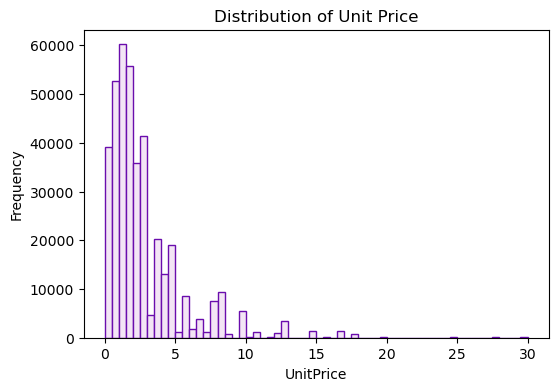

In [192]:
plt.figure(figsize=(6,4))
data[data['UnitPrice']<=30]['UnitPrice'].plot(kind='hist',color='#F3E5F5',
    edgecolor='#6A0DAD',bins=60)
plt.title("Distribution of Unit Price")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

# Interpretation -
* The unit price distribution is highly right-skewed, with most products priced at lower values and a small number of high-priced items. The concentration of bars indicates that many products fall within a narrow price range. This pattern is typical in retail data and motivates the use of log-scaled analysis for better visualization of pricing variation.

### 4.1.3 Univarient EDA - Unit price 

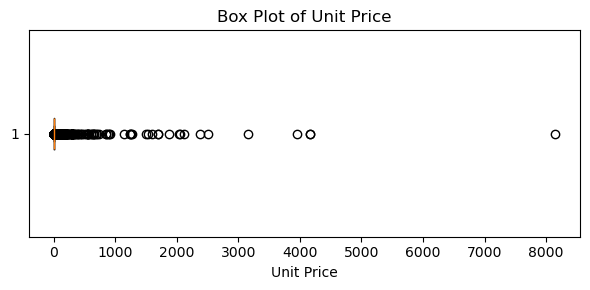

In [194]:
plt.figure(figsize=(6,3))
plt.boxplot(data['UnitPrice'], vert=False)
plt.title("Box Plot of Unit Price")
plt.xlabel("Unit Price")
plt.tight_layout()
plt.show()


# Interpretation -
* The box plot reveals a highly right-skewed distribution of unit prices, with the majority of products concentrated at lower price ranges and several extreme outliers on the higher end. These outliers represent premium or bulk-priced items and can significantly influence monetary value, highlighting the need for appropriate scaling during feature engineering.

### 4.1.4 Univarient EDA- Transaction value Total Price

In [37]:
data["TotalPrice"]=data['Quantity']*data['UnitPrice']# Creating Col of Totalprice col
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


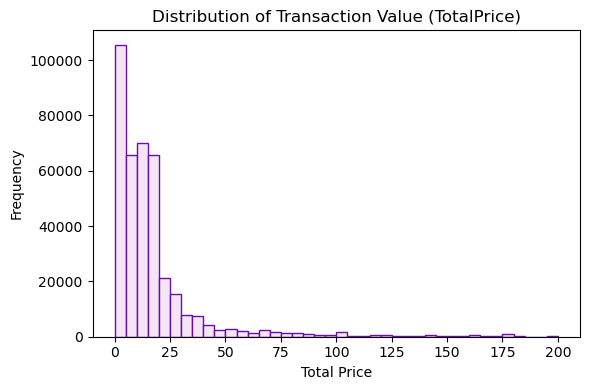

In [195]:
plt.figure(figsize=(6,4))
data[data['TotalPrice'] <= 200]['TotalPrice'].plot(kind='hist',color='#F3E5F5',
    edgecolor='#6A0DAD', bins=40)
plt.title("Distribution of Transaction Value (TotalPrice)")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Interpretation-
* The distribution of transaction value (TotalPrice) is highly right-skewed, indicating that the majority of transactions generate low revenue, typically below 25–30 units. As the transaction value increases, the frequency drops sharply, with only a small number of purchases contributing higher revenue. This pattern suggests that while most customers make low-value purchases, a limited number of high-value transactions play a significant role in overall revenue, highlighting the importance of monetary value in customer segmentation.

### 4.1.5 Univarient EDA- Customer per Country

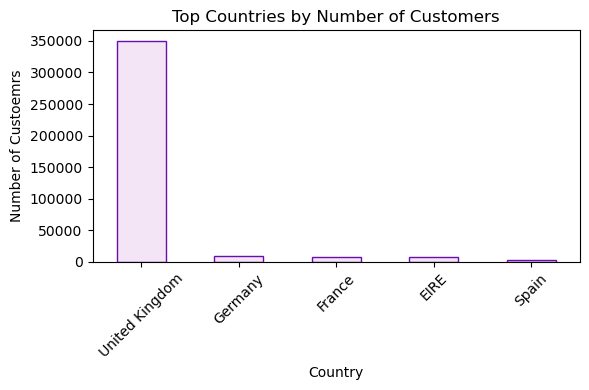

In [196]:
plt.figure(figsize=(6,4))
top_countries= data['Country'].value_counts().head(5)
top_countries.plot(kind='bar',color='#F3E5F5',
    edgecolor='#6A0DAD')
plt.title("Top Countries by Number of Customers")
plt.xlabel("Country")
plt.ylabel("Number of Custoemrs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation -
* The bar chart shows that the majority of customers are concentrated in the United Kingdom, indicating that it is the primary market for the business. Other countries such as Germany, France, EIRE, and Spain contribute a significantly smaller share of customers. This highlights a strong geographic concentration, suggesting that customer behavior and purchasing patterns are largely driven by the UK market, with potential opportunities for growth in other regions.

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
 4.2 Biavariate Exploratory Data Analysis

### 4.2.1 Bivariate EDA- Quantity vs Total Price

In [40]:
# Sample data to avoid overplotting caus we have large data set 
sampled_data=data.sample(10000,random_state=42)


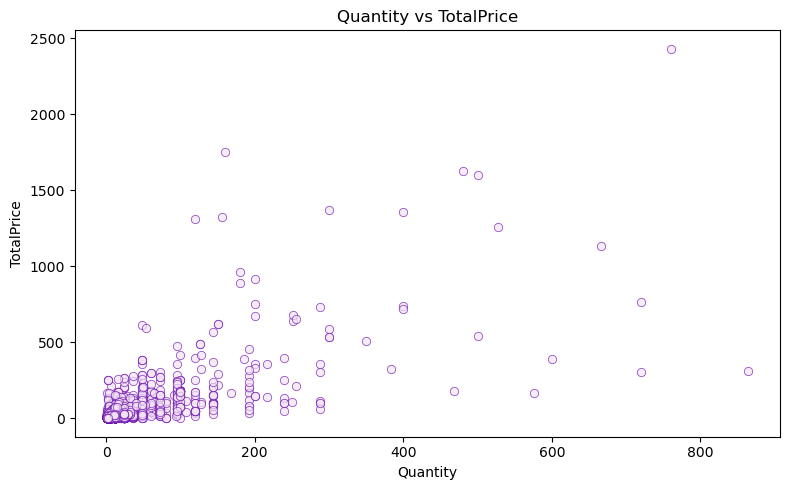

In [197]:
plt.figure(figsize=(8,5))
plt.scatter(
    sampled_data['Quantity'],
    sampled_data['TotalPrice'],
    c='#F3E5F5',
    alpha=0.7,
    edgecolors='#6A0DAD',  # dark purple border
    linewidths=0.6
)
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.title('Quantity vs TotalPrice')
plt.tight_layout()
plt.show()


# Interpretation -
* As quantity increases, total price usually increases, but the spread of points shows that customers buy in different ways—some buy more items, while others spend more on expensive products.

### 4.2.2 Biavarient EDA - Quantity vs Unitpric

In [42]:
# scatter plot to understand the relationship between Qunatity and UnitPrice
# using smapled data to abvoid overplotting due to large dataset

Text(0.5, 1.0, 'Quantity vs UnitPrice')

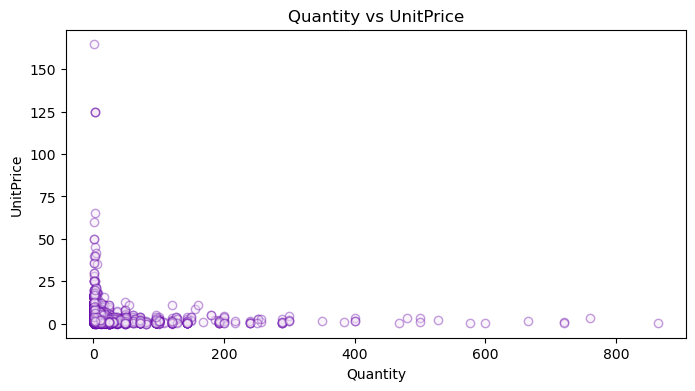

In [198]:
plt.figure(figsize=(8,4))
plt.scatter(
    sampled_data['Quantity'],
    sampled_data['UnitPrice'],
    alpha=0.4,
    edgecolors='#6A0DAD',
    c='#F3E5F5',
)

plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title("Quantity vs UnitPrice")

# Interpretation -
* Most Purcheses with high quantity have low unit price
* High-Priced items are genrally bought in small quantities.
* This shows two buying patterns:
    * 1.Bulk buying of cheep products 
    * 2.Low-quantity purches of expensive products.

### 4.2.3 Biavarient EDA - UnitPrice vs Total price

In [44]:
# scatter plot to understand relationship between unitprice and Total price

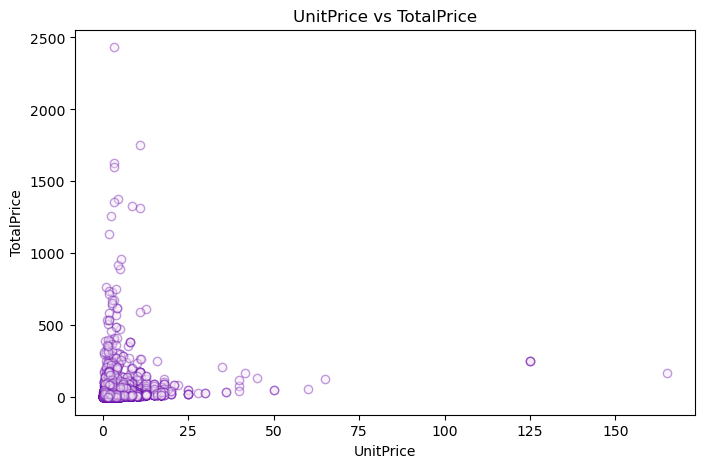

In [199]:
plt.figure(figsize=(8,5))
plt.scatter(
    sampled_data['UnitPrice'],
    sampled_data['TotalPrice'],
    alpha=0.4,
    edgecolors='#6A0DAD',
    c='#F3E5F5',
)

plt.xlabel('UnitPrice')
plt.ylabel('TotalPrice')
plt.title("UnitPrice vs TotalPrice")
plt.show()

# Interpretation-
* Most transactions have low unit prices and low total prices.

* A few high unit price items generate high total price, even with small quantities.
* High total price can come from:
     * Expensive items, or
     * Moderately priced items bought in bulk.

### 4.2.3 Bivariate- Country vs TotalPrice

In [46]:
# Aggregate total revenue by country
country_revenue =data.groupby('Country')['TotalPrice'].sum()

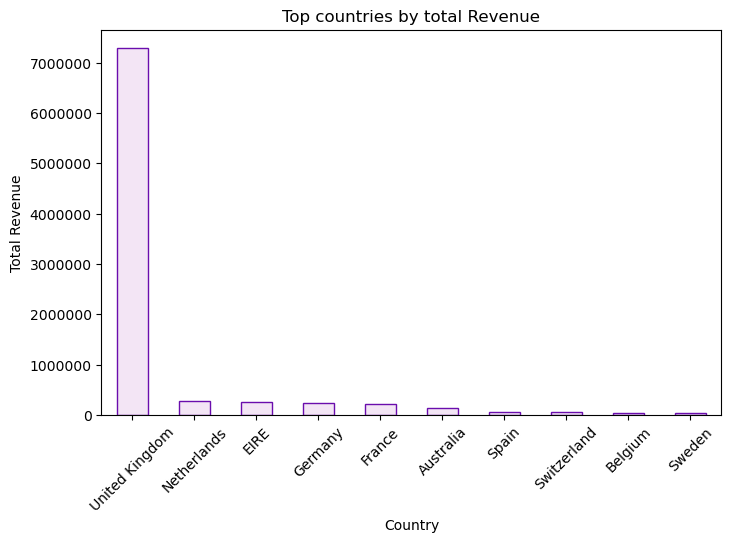

In [200]:
# select top countries by revenue
top_countries_revenue=country_revenue.sort_values(ascending=False).head(10)

# Bar plot for revenue by country
plt.figure(figsize=(8,5))
top_countries_revenue.plot(kind='bar',color='#F3E5F5',
    edgecolor='#6A0DAD')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Top countries by total Revenue")
plt.xticks(rotation=45)
plt.show()


# Interpretation -
* The United Kingdom generates the highest revenue by a very large margin, while a few Europen countries contribute modrate revenue and most otehr countries contribute very little.

### 4.2.4 Bivariate - InvoiceDate vs TotalPrice

In [48]:
# Convert InvoiceDate safely when formats are mixed
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='mixed')


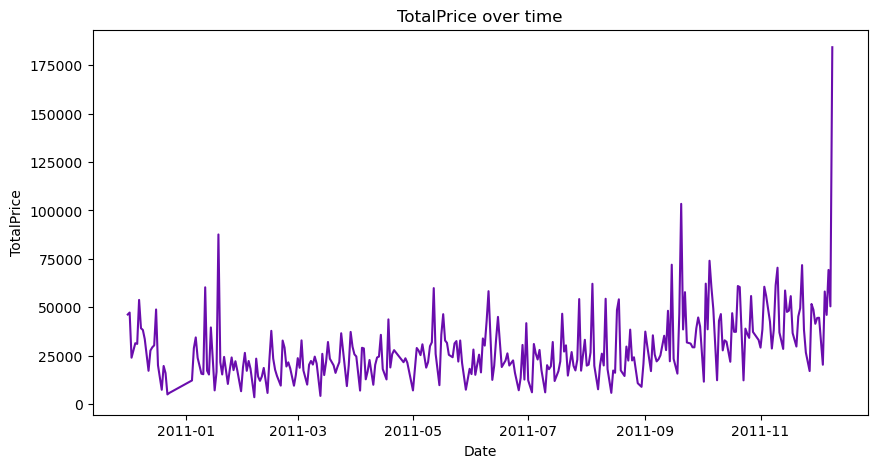

In [201]:
# Aggregate total sales per day
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()

# plot time -based trend
plt.figure(figsize=(10,5))
plt.plot(daily_sales,color='#6A0DAD',  )
plt.xlabel("Date")
plt.ylabel("TotalPrice")
plt.title("TotalPrice over time")
plt.show()

## Interpretation -
* Total sales change over time, with higher sales mainly occurring in 2011 and some days showing very high sales peaks.

### 4.2.5 Biavariate - Monthly sales trand

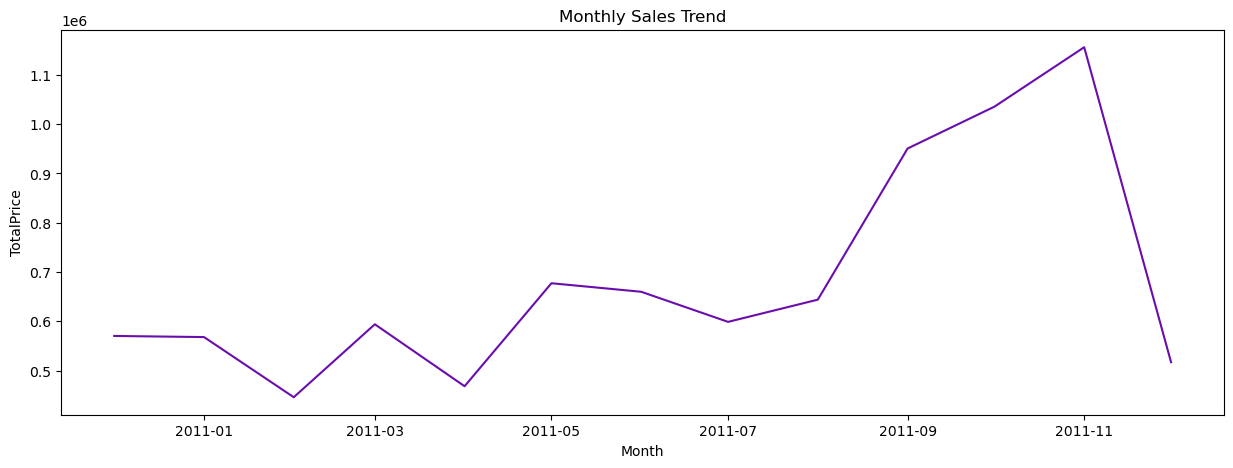

In [203]:
# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='mixed')

# Create Year-Month column
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Calculate monthly total sales
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot monthly sales trend
plt.figure(figsize=(15,5))
plt.plot(monthly_sales,color='#6A0DAD',  )
plt.xlabel('Month')
plt.ylabel('TotalPrice')
plt.title('Monthly Sales Trend')
plt.show()


# Interpretaion -
* Monthly sales show an increasing trend through 2011 with a peak around November, and the drop in the final month is due to incomplete data rather than an actual decline in sales.

<a id="section5"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 5 | Feature Engineering (RFM Analysis)
</p>







<a id="section5"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 5 | Feature Engineering
</p>

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
5.1. Feature Engineering - Reference date

In [51]:
# RFM is used as a feature engineering step to convert transaction-level data into meaningful customer-level features


In [52]:
reference_date= data["InvoiceDate"].max()+pd.Timedelta(days=1)# Set reference date as one day after the last invoice date in the dataset

In [53]:
reference_date

Timestamp('2011-12-10 12:50:00')

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
    5.2 Calculate RFM - RFM table represent customer level purchasing behaviour

### 
* Recency- Days since last purches
* Frequency-how many times customer purchesed ,
* Monetary-Total money spend

In [54]:
last_purchase =data.groupby("CustomerID")['InvoiceDate'].max()

In [55]:
recency = (reference_date-last_purchase).dt.days# Calculating REcency

In [56]:
frequency =data.groupby('CustomerID')['InvoiceDate'].nunique()# CAlculating the frequqncy

In [57]:
monetary =data.groupby('CustomerID')['TotalPrice'].sum()


In [58]:
# Combining inot RFM table
rfm=pd.concat([recency,frequency,monetary],axis=1)
rfm.columns=['Recency','Frequency','Monetarry']
rfm.head()

,Recency,Frequency,Monetarry
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">5.3 Sanity Checking


###
* Perform sanity checks to ensure RFM values are valid and ready for modeling 

In [59]:
rfm.shape
rfm.info()# # RFM dataset is customer-level, so number of rows equals number of unique customers, not transactions


<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetarry  4338 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [60]:
rfm.describe()# cheking invalid values,Recency=>0,Frequqncy=>1,Monetary>0

,Recency,Frequency,Monetarry
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.250807,2048.688081
std,100.014169,7.635202,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,306.482500
50%,51.000000,2.000000,668.570000
75%,142.000000,5.000000,1660.597500
max,374.000000,210.000000,280206.020000


In [61]:
(rfm<=0).sum()

Recency      0
Frequency    0
Monetarry    0
dtype: int64

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
5.3 Scaling RFM Features 

#
* RFM are on very diffrent scales 

In [62]:
scaler= StandardScaler()
# scale RFM features
rfm_scaled=scaler.fit_transform(rfm)# RFM features are scaled to ensure equal contribution in distance-based clustering


In [63]:
# Converting back to Dataframe for Readability
rfm_scaled=pd.DataFrame(
    rfm_scaled,
    index=rfm.index,
    columns=['Recency',"Frequecy",'Monetary']
)
# check scaled data
rfm_scaled.head()

,Recency,Frequecy,Monetary
CustomerID,,,
12346.0,2.334574,-0.425815,8.363010
12347.0,-0.905340,0.360110,0.251699
12348.0,-0.175360,-0.032853,-0.027988
12349.0,-0.735345,-0.425815,-0.032406
12350.0,2.174578,-0.425815,-0.190812


<a id="section6"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 6 | Customer Segmentation (Unsupervised Learning)
</p>





<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
6.1 K-Means Clustering

###  
* Understand natural Grouping
* Get and initial silhouette score
* Create temporary cluster lables

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 6.1.1 Elbow Method for Finding k 

In [65]:
inertia = []
k_range= range(2,11)


for k in k_range:
    kmeans =KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

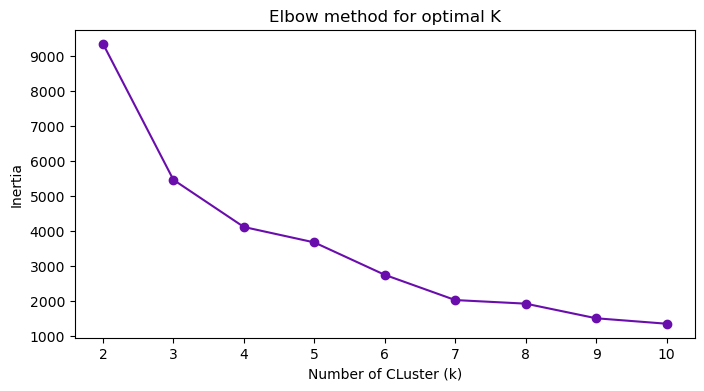

Optimal cluster : k is 4


In [204]:
# Plot the ELow curve
plt.figure(figsize=(8,4))
plt.plot(k_range,inertia,marker='o',color='#6A0DAD',  )
plt.xlabel('Number of CLuster (k)')
plt.ylabel('Inertia')
plt.title("Elbow method for optimal K")
plt.show()
print("Optimal cluster : k is 4")# After k-4  the curve starts falttening

### 6.1.2 Silhouette Method 

In [67]:
silhouette_scores=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels= kmeans.fit_predict(rfm_scaled)
    score =silhouette_score(rfm_scaled,labels)
    silhouette_scores.append(score)
    print(f"k={k},Silhouette Score ={score:.4f}")
    

print("Optimal cluster : k is 4")# k=4 has the highest silhouet score so we can consider k=4


k=2,Silhouette Score =0.5603
k=3,Silhouette Score =0.5940
k=4,Silhouette Score =0.6159
k=5,Silhouette Score =0.4734
k=6,Silhouette Score =0.4906
k=7,Silhouette Score =0.5188
k=8,Silhouette Score =0.4335
k=9,Silhouette Score =0.4760
k=10,Silhouette Score =0.4251
Optimal cluster : k is 4


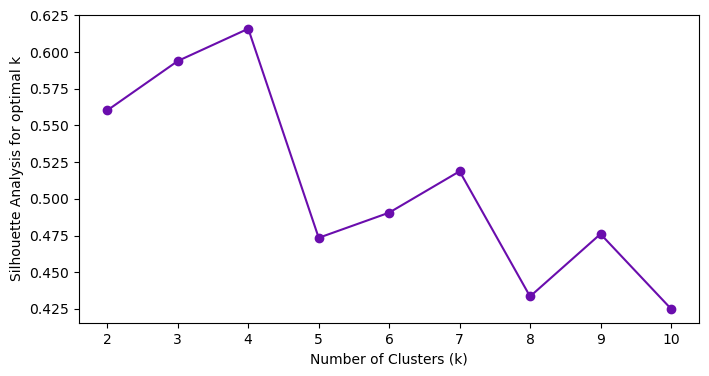

Optimal cluster : k is 4


In [205]:
# Plot Silhouette Scores
plt.figure(figsize=(8,4))
plt.plot(k_range,silhouette_scores,marker='o',color='#6A0DAD',  )
plt.xlabel("Number of Clusters (k)")
plt.ylabel('Silhouette Analysis for optimal k')
plt.show()
print("Optimal cluster : k is 4")# k=4 has the highest silhouet score so we can consider k=4

#### Based on the elbow nad silhouette method analysis ,K=4 was selected as the optimal number of customer segments 

### 6.1.3 Build K-Means model

In [69]:
# K-means model with the optimal K
final_kmeans =KMeans(n_clusters=4,random_state=42)

# Fit ans Predict the Cluster
rfm["Cluster"]= final_kmeans.fit_predict(rfm_scaled)



print("Assinged Fianl Customer segment using K-Means Clustring")
# Check few rows
rfm.head()

Assinged Fianl Customer segment using K-Means Clustring


,Recency,Frequency,Monetarry,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,0
12347.0,2,7,4310.00,1
12348.0,75,4,1797.24,1
12349.0,19,1,1757.55,1
12350.0,310,1,334.40,3


In [70]:
rfm.groupby('Cluster').mean()# Interpret CLusert understanding Cutomers behaviour

,Recency,Frequency,Monetarry
Cluster,,,
0,15.371429,21.861905,12425.436905
1,43.931870,3.648542,1349.020843
2,7.384615,81.692308,127187.959231
3,248.564030,1.551789,476.330547


#### What we can see here 
* Lower Recency - More recent purchase
* Higher Frequnecy -Buys Often
* Higher Monetary -spends more
#### Cluster 2 - Best Custoemers
* Lowest Rececy
* Highest Frequqncy
* Extremely high Monetary-Most valuable Customer
#### Cluster 0 - High-Value Regular Customers
* Recent Buyers
* Good Frequency
* High Spend - Strong Customers,slightly less that best Customers
#### Cluster 1- Average / Occasional Customers
* Moderate Recency
* Low-Medium Frequqncy
* Medium spend- Potential to grow
#### Cluster 3- At-Risk /Lost Customers
* Very High Recency(not that much active)
* Very low frequency
* Very low Spend - Churn-risk Customers
  

### 6.1.4 PCA (2D) 
* PCA helps visualize cutomer segment clearly by reducing RFM features to fewer dimensions

In [71]:
from sklearn.decomposition import PCA


In [72]:
# Apply PCA with 2 Components 
pca_2d= PCA(n_components=2,
           random_state=42)
rfm_pca_2 = pca_2d.fit_transform(rfm_scaled)

In [73]:
# Convert to Dataframe 
rfm_pca_df=pd.DataFrame(
    rfm_pca_2,
    columns=['PC1','PC2'],
    index=rfm.index
)

In [74]:
# Add Cluster lables
rfm_pca_df['Cluster']=rfm['Cluster']

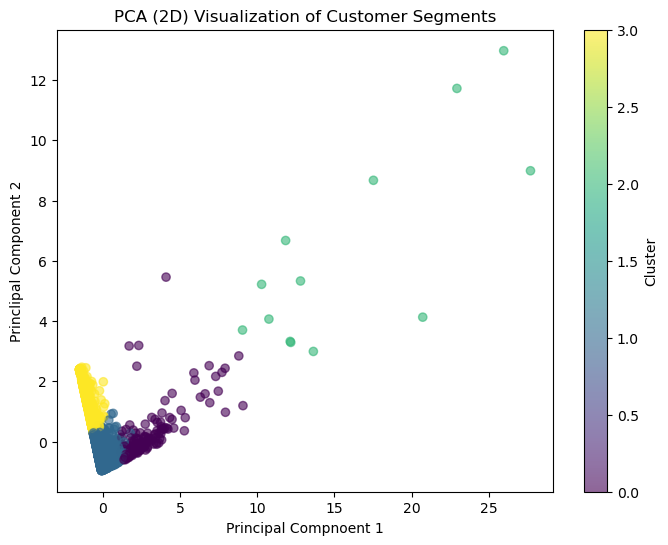

In [75]:
# Plot the 2d PCA
plt.figure(figsize=(8,6))
scatter =plt.scatter(
    rfm_pca_df['PC1'],
    rfm_pca_df['PC2'],
    c=rfm_pca_df['Cluster'],
    alpha=0.6
)

plt.xlabel('Principal Compnoent 1')
plt.ylabel('Princlipal Component 2')
plt.title("PCA (2D) Visualization of Customer Segments")
plt.colorbar(scatter,label="Cluster")
plt.show()

# Interpretaion -
* The PCA plot shows four customer segments that are mostly well seprated , confirming that the K-Means model has grouped custoemrs with similar purchesing behaviour effectively

### 6.1.5 PCA 3D-
* Visualization Customer segment in 3d space
* further validate cluster sepration 
*imporve the presentaion quality

In [76]:
from mpl_toolkits.mplot3d import Axes3D

In [77]:
# Apply PCA with 3 Componets 
pca_3d = PCA (n_components=3,
             random_state=42)
rfm_pca_3d= pca_3d.fit_transform(rfm_scaled)

In [78]:
# create a dataframe
rfm_pca_3d_df =pd.DataFrame(
    rfm_pca_3d,
    columns=['PC1','PC2','PC3'],
    index=rfm.index
)

In [79]:
# add cluster lables
rfm_pca_3d_df['Cluster']= rfm['Cluster']

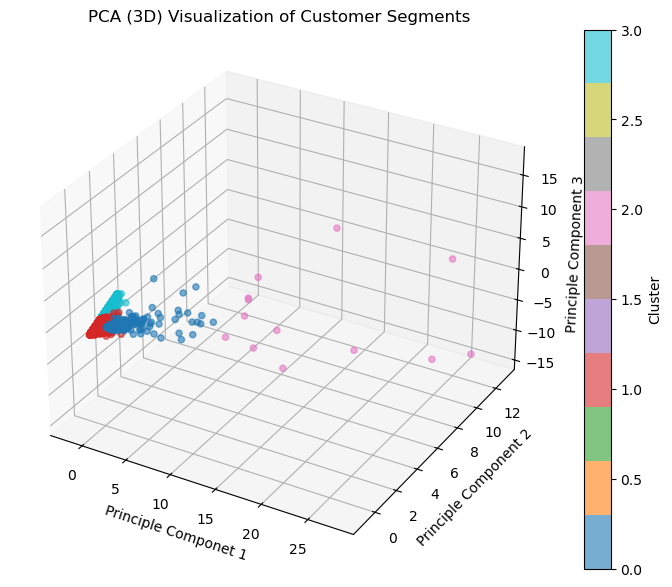

In [80]:
# Plot the 3d PCA
fig= plt.figure(figsize=(9,7))
ax=fig.add_subplot(111, projection='3d')

scatter= ax.scatter(
    rfm_pca_3d_df['PC1'],
    rfm_pca_3d_df['PC2'],
    rfm_pca_3d_df['PC3'],
    c=rfm_pca_3d_df['Cluster'],
    cmap='tab10',
    alpha=0.6
)

ax.set_xlabel('Principle Componet 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel("Principle Component 3")
ax.set_title('PCA (3D) Visualization of Customer Segments')

fig.colorbar(scatter,ax=ax, label='Cluster')
plt.show()

# Interpretaion -
* The 3D PCA plot shows distinnt customer segment , futher validating the effectiveness of the clustering model.

### For Hypertune K-Means - 
* K-Means was hyper-tuned by optimizaing the numer of cluster using elblow and silhouette analysis

### 6.1.6 Evaluation Table For comparing the Models

In [81]:
Comparison_table =pd.DataFrame(columns=[
    'Models',
    "Silhouette Score",
    "Number of CLuster",
    "Business InterPretablity"
])
Comparison_table

,Models,Silhouette Score,Number of CLuster,Business InterPretablity


In [82]:
silhouette_kmeans = silhouette_score(rfm_scaled,rfm['Cluster'])
silhouette_kmeans

np.float64(0.6159438785488908)

In [83]:

# Add K-Means Result to Comparison table
Comparison_table.loc[0]=[
    'K-Means',
    silhouette_kmeans,
    4,
    'Very clear :VIP,High,Average,At-Risk Customers'
]

Comparison_table

,Models,Silhouette Score,Number of CLuster,Business InterPretablity
0,K-Means,0.615944,4,"Very clear :VIP,High,Average,At-Risk Customers"


#### K-Means Clustering producaed well-sepraetd and business - interpretable customer segment, making it a strong baseline for comparison

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">6.2 Hierachical Clustering

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">6.2 Plot Dendogram 

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage


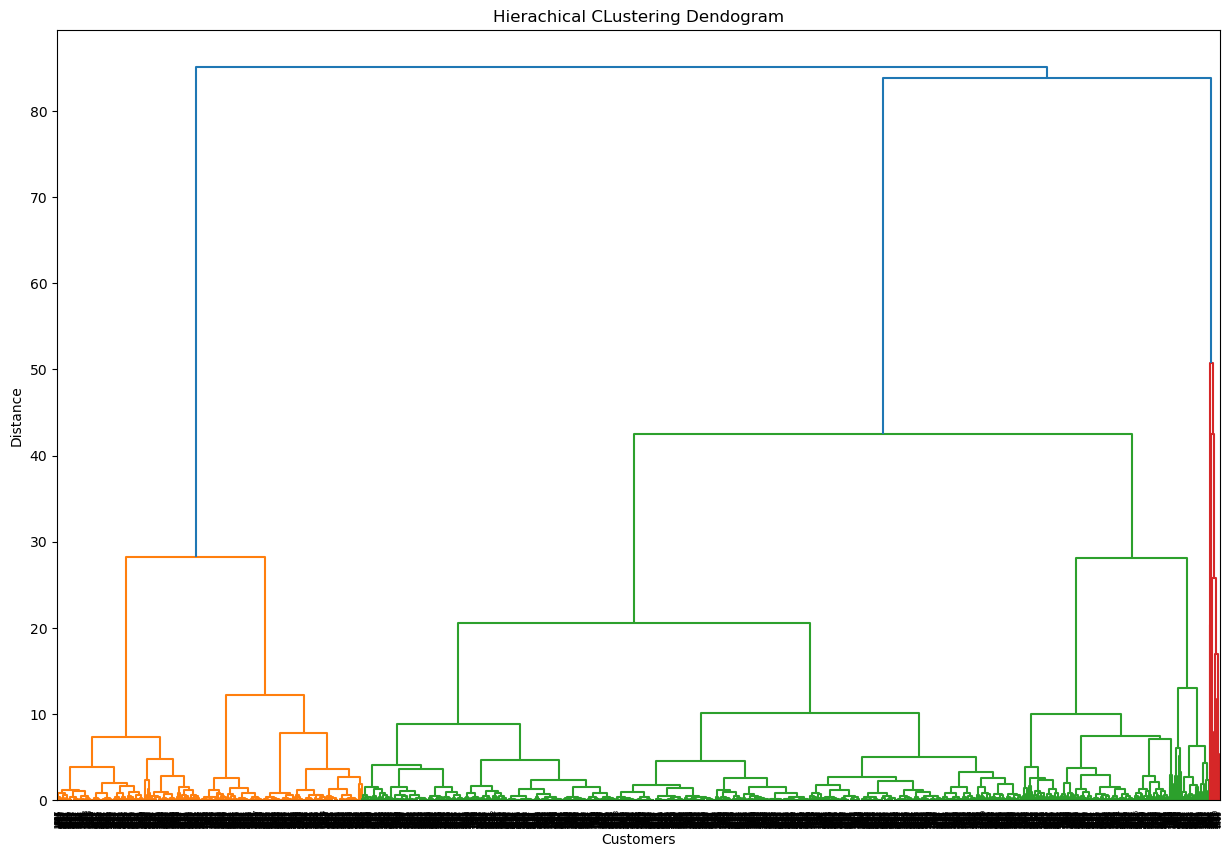

The Dendogram shows clear verical gaps,indicating the presence of around 4 moajor clusters,which supports the choice of k=4 for hierachical clustering


In [85]:
linked =linkage(rfm_scaled,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked)
plt.title('Hierachical CLustering Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()
print("The Dendogram shows clear verical gaps,indicating the presence of around 4 moajor clusters,which supports the choice of k=4 for hierachical clustering")

#### 6.2.2 Build Agglomerative Clustring Model

In [86]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
# model building
hc =AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)
# Assign cluster lables
rfm['HC_Cluster']=hc.fit_predict(rfm_scaled)

# check result
rfm.head()
print("Agglomerative clustring is applied to assign customers inot 4 hierachical segments based on rfm features ")

Agglomerative clustring is applied to assign customers inot 4 hierachical segments based on rfm features 


In [88]:
rfm['HC_Cluster'].value_counts()

HC_Cluster
2    3163
1    1138
0      32
3       5
Name: count, dtype: int64

#### 6.2.3 2D PCA Visualization for Hirarchical Clustering

In [89]:
rfm_pca_df['HC_Cluster']=rfm['HC_Cluster']

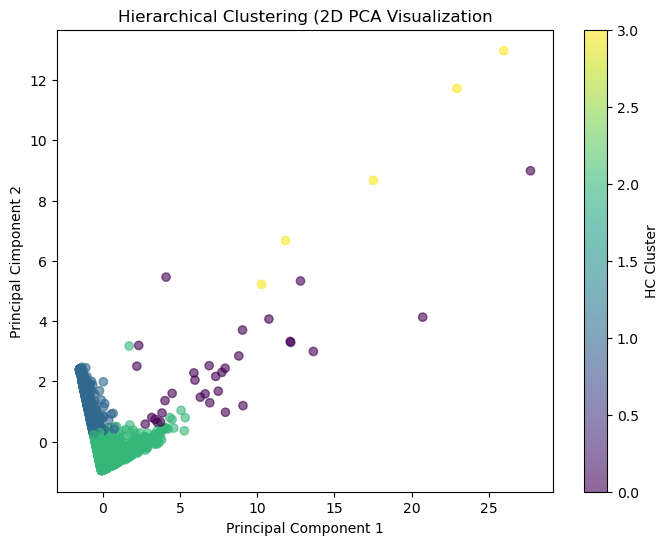

In [90]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(
    rfm_pca_df['PC1'],
    rfm_pca_df['PC2'],
    c=rfm_pca_df['HC_Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Cimponent 2')
plt.title("Hierarchical Clustering (2D PCA Visualization")
plt.colorbar(scatter,label="HC Cluster")
plt.show()

####
* Although K-Means and Hierarchical Clustering use diffrent algorithms,they produced very similar cluster structures on this dataset, indicating stable and well-defined customer segments.
* Diffrent clustering algorithms are producing similar results so we can say cuatomers behavior patterns are strong and well separaed.

#### 6.2.4 - Evaluate Hierarchical Clustering

In [91]:
# Calculate silhouette score for Hierarchical Clustering
silhouette_hc=silhouette_score(rfm_scaled,rfm['HC_Cluster'])
print(silhouette_hc)
print("The silhouette score indicates how well custoemers are seprated inot hierarchical cluster,with higher values representing better-deined clusters")

0.5877115777137744
The silhouette score indicates how well custoemers are seprated inot hierarchical cluster,with higher values representing better-deined clusters


#### 6.2.5 - ADD Hierarchical Clustering to Comparision table


In [92]:
# Add K-Means Result to Comparison table
Comparison_table.loc[1]=[
    'Hirarchical Clustering',
    silhouette_hc,
    4,
    'Clear Segments but slightly overlapping compared to K-Means'
]

Comparison_table

,Models,Silhouette Score,Number of CLuster,Business InterPretablity
0,K-Means,0.615944,4,"Very clear :VIP,High,Average,At-Risk Customers"
1,Hirarchical Clustering,0.587712,4,Clear Segments but slightly overlapping compar...


<h3 style="color:balck ; font-family:Clibri;text-align:center;;"> 6.3 DBSCAN 

#### 6.3.1Set
* WE have 3 feautres so minimum sample should 2*no.of features 

In [93]:
min_samples =6

#### 6.3.2 K-Distance Graph

In [94]:
from sklearn.neighbors import NearestNeighbors

In [95]:
# Fit nearest neighbors
neighbors=NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(rfm_scaled)

In [96]:
# Get distance
distance,indices=neighbors_fit.kneighbors(rfm_scaled)

In [97]:
# sort distance  take the 6th nearest neighbor
distance=np.sort(distance[:5])

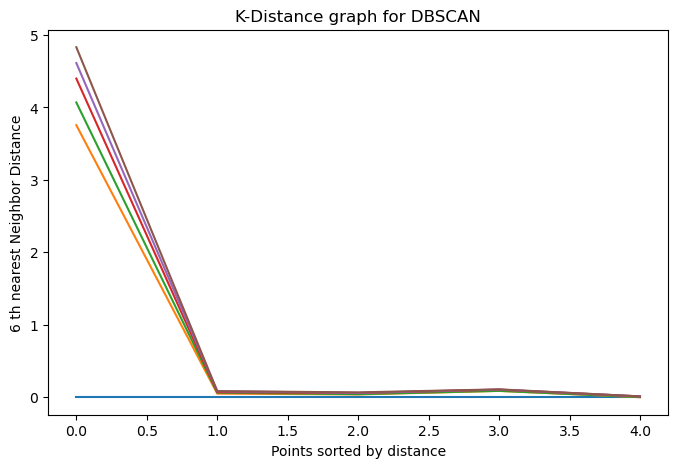

In [98]:
# Plot k-Distance graph
plt.figure(figsize=(8,5))
plt.plot(distance)
plt.xlabel("Points sorted by distance")
plt.ylabel("6 th nearest Neighbor Distance")
plt.title("K-Distance graph for DBSCAN")
plt.show()

### Intrepretaion -
* The Elbow in the K-Distance apprers around the 0.25-0.40 indicating a clear transition from dense regions to sparse points. Hence eps values =0.25,0.3,0.35 were experimented.

#### 6.3.3 Build the model eps=0.25

In [99]:
from sklearn.cluster import DBSCAN
# Build the model
dbscan_025=DBSCAN(eps=0.25,min_samples=6)
# fit and get cluster lables
rfm['DBSCAN_Cluster_025']=dbscan_025.fit_predict(rfm_scaled)

In [100]:
# check first few rows
rfm[['DBSCAN_Cluster_025']].head()

,DBSCAN_Cluster_025
CustomerID,
12346.0,-1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


In [101]:
rfm[['DBSCAN_Cluster_025']].value_counts()

DBSCAN_Cluster_025
 0                    4188
-1                     138
 1                      12
Name: count, dtype: int64

#### 6.3.4 Build the model eps=0.3

In [102]:
# Build the model
dbscan_03=DBSCAN(eps=0.3,min_samples=6)
# fit and get cluster lables
rfm['DBSCAN_Cluster_03']=dbscan_03.fit_predict(rfm_scaled)

In [103]:
rfm[['DBSCAN_Cluster_03']].head()

,DBSCAN_Cluster_03
CustomerID,
12346.0,-1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


In [104]:
rfm[['DBSCAN_Cluster_03']].value_counts()

DBSCAN_Cluster_03
 0                   4225
-1                    107
 1                      6
Name: count, dtype: int64

#### 6.3.5 Build the model eps=0.35

In [105]:
dbscan_035=DBSCAN(eps=0.35,min_samples=6)
# fit and get cluster lables
rfm['DBSCAN_Cluster_035']=dbscan_035.fit_predict(rfm_scaled)

In [106]:
rfm[['DBSCAN_Cluster_035']].head()

,DBSCAN_Cluster_035
CustomerID,
12346.0,-1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


In [107]:
rfm[['DBSCAN_Cluster_035']].value_counts()

DBSCAN_Cluster_035
 0                    4241
-1                      89
 1                       8
Name: count, dtype: int64

#### 6.3.6 Build the model eps=0.40

In [108]:
dbscan_040=DBSCAN(eps=0.40,min_samples=6)
# fit and get cluster lables
rfm['DBSCAN_Cluster_040']=dbscan_040.fit_predict(rfm_scaled)

In [109]:
rfm[['DBSCAN_Cluster_035']].head()

,DBSCAN_Cluster_035
CustomerID,
12346.0,-1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


In [110]:
rfm[['DBSCAN_Cluster_040']].value_counts()

DBSCAN_Cluster_040
 0                    4260
-1                      78
Name: count, dtype: int64

## Compareason for all eps to find best one
* Diffrent eps values (0.25,0.3,0.35,0.4) were evaluated for DBscan. Lower eps values were too strict ,producing excessive noise, while higher eps (0.40) merged most customers into single cluster.An eps fo 0.35 provied the best balance between cluster formation and noise, resultign in meaningful and interpretable customers segment.
* So best eps =0.35 


#### 6.3.5 Adding DBScan to Comparison table

In [111]:
# DBScan eps=0.35 result
dbscan_labels=rfm['DBSCAN_Cluster_035']

# count noise points
noise_points =(dbscan_labels==-1).sum()

# Count clusters excludeing noise
n_clusters=len(set(dbscan_labels))-(1 if -1 in dbscan_labels else 0)

noise_points,n_clusters

(np.int64(89), 3)

In [112]:
# Add DBScan reo to comparison table
Comparison_table.loc[len(Comparison_table)]=[
    'DBSCAN',
    'N/A',
    n_clusters,
    f'Noise detected:{noise_points} customers'
]


In [113]:
Comparison_table

,Models,Silhouette Score,Number of CLuster,Business InterPretablity
0,K-Means,0.615944,4,"Very clear :VIP,High,Average,At-Risk Customers"
1,Hirarchical Clustering,0.587712,4,Clear Segments but slightly overlapping compar...
2,DBSCAN,N/A,3,Noise detected:89 customers


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">6.4 Gaussian Mixture Model GMM-


* GMM clusters customers based on probability ,allowing overlapping clusters

#### 6.4.1 Import and Decide number of clusters to biuld model

In [114]:
from sklearn.mixture import GaussianMixture

In [115]:
#biult or define the model
gmm = GaussianMixture(
    n_components=4, # we already found 4 Clusteers using k_means and Hirarchical so we keep n=4
    random_state=42
    
)

#### 6.4.2 Fit GMM and creat Cluster Lables

In [116]:
# fit GMM and geccluster labels
rfm['GMM_Cluster']=gmm.fit_predict(rfm_scaled)

In [117]:
rfm[['GMM_Cluster']].head()

,GMM_Cluster
CustomerID,
12346.0,0
12347.0,1
12348.0,1
12349.0,1
12350.0,3


In [118]:
rfm['GMM_Cluster'].value_counts()

GMM_Cluster
3    2153
1    1621
0     485
2      79
Name: count, dtype: int64

#### 6.4.3 GMM Visualization

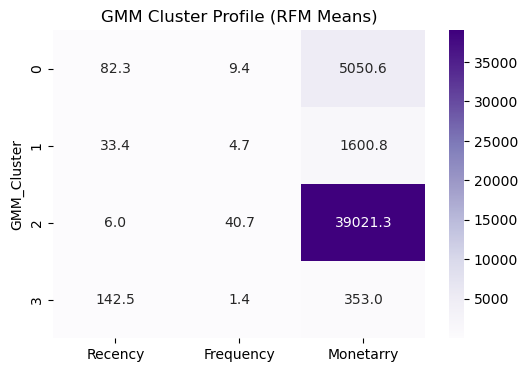

In [211]:
cluster_profile =rfm.groupby("GMM_Cluster")[['Recency','Frequency','Monetarry']].mean()

# Heatmap ploting
plt.figure(figsize=(6,4))
sns.heatmap(cluster_profile,annot=True,
           cmap='Purples',
           fmt='.1f')
plt.title('GMM Cluster Profile (RFM Means)')
plt.show()

## Intrepretaion -
* The GMM haatmap shows clear and meaningful customer segments. The distance of Monetary values reflects natural spending variation in e-commerce data,highlighting a distinct high-value customer group.This confirms effiective seggmentation.

#### 6.4.4 Evaluation of GMM

In [120]:
# Silhouette score
sil_gmm=silhouette_score(rfm_scaled,rfm['GMM_Cluster'])
sil_gmm

np.float64(0.163213533614051)

In [121]:
# Number of clusters 
rfm['GMM_Cluster'].nunique()


4

In [122]:
# Cluster Size Distribution
rfm['GMM_Cluster'].value_counts()

GMM_Cluster
3    2153
1    1621
0     485
2      79
Name: count, dtype: int64

#### 
* The silhouette score for GMM is relatively low compared to K-Means and Hirarchical CLustering. This expected beacause GMM allows overlappig clusters and soft assignments,which reduce silhouette values.However,the rfm heatmap shoes clearly distinguishble and meaingful string business interpretability

#### 6.4.5 Add GMM to comparision table

In [123]:
Comparison_table.loc[len(Comparison_table)]=[
    'GMM',
    round(sil_gmm,3),
    rfm['GMM_Cluster'].nunique(),
    'Probabilistic clusters; Meaningful RFM sepration but overlapping'
]


<a id="section7"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 7 | Secting Best Clustering Model
</p>



In [124]:
Comparison_table

,Models,Silhouette Score,Number of CLuster,Business InterPretablity
0,K-Means,0.615944,4,"Very clear :VIP,High,Average,At-Risk Customers"
1,Hirarchical Clustering,0.587712,4,Clear Segments but slightly overlapping compar...
2,DBSCAN,N/A,3,Noise detected:89 customers
3,GMM,0.163,4,Probabilistic clusters; Meaningful RFM seprati...


#### K-Means achieved a silhouette score of 0.615944 indicating well-Seprated and choice segments.Hierarchical Clustering aslo performed well with a silhoutte score of 0.5877 , but k-Means demonstrated slightly superior cluster quality was selected as final model.

<a id="section8"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 8 | Target Variable Creation



</p>



<h3 style="color:balck ; font-family:Clibri;text-align:center;;">
Section 8 | Create Target Column


In [125]:
# Create target variable for supervised learning
rfm['Customer_Segment']=rfm['Cluster']


In [126]:
rfm[['Customer_Segment']].head()

,Customer_Segment
CustomerID,
12346.0,0
12347.0,1
12348.0,1
12349.0,1
12350.0,3


In [127]:
rfm['Customer_Segment'].value_counts()

Customer_Segment
1    3053
3    1062
0     210
2      13
Name: count, dtype: int64

In [128]:
rfm.head()

,Recency,Frequency,Monetarry,Cluster,HC_Cluster,DBSCAN_Cluster_025,DBSCAN_Cluster_03,DBSCAN_Cluster_035,DBSCAN_Cluster_040,GMM_Cluster,Customer_Segment
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,0,0,-1,-1,-1,-1,0,0
12347.0,2,7,4310.00,1,2,0,0,0,0,1,1
12348.0,75,4,1797.24,1,2,0,0,0,0,1,1
12349.0,19,1,1757.55,1,2,0,0,0,0,1,1
12350.0,310,1,334.40,3,1,0,0,0,0,3,3


In [129]:
rfm.to_csv("rfm.csv",index=False)

<a id="section9"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 9 | Supervised Learning – Data Preparation
</p>



<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.1 create X features and y

In [130]:
# features scaled RFM
X=rfm_scaled.copy()

# Target Cluster lables
y = rfm['Customer_Segment']

print(X.shape)
print(y.shape)

(4338, 3)
(4338,)


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.2 Train-Test split

In [131]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [132]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#### 9.2 Buuild Logistic Regression 

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
# Intialize model
lr_model=LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)

In [135]:
# train model
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

#### 9.2.1 Make Prediction

In [136]:
y_pred_lr = lr_model.predict(X_test)

### 9.2.2 Evaluate Logsitic Regression

In [137]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [138]:
# Accuracy
lr_acc= accuracy_score(y_test,y_pred_lr)
print("Logistic Regression Accuracy:",lr_acc)

Logistic Regression Accuracy: 0.9965437788018433


#### 
* The Logistic Regression model achived a very high accuracy,indicating that it correctly classifed most customers into their respective segments.This high accuracy is expected beacuse the target lables were derived from clustering based on the same RFM features

In [139]:
# Classification Report
print("Classification Reprot:")
print(classification_report(y_test,y_pred_lr))

Classification Reprot:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       1.00      1.00      1.00       596
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00       225

    accuracy                           1.00       868
   macro avg       0.99      0.99      0.99       868
weighted avg       1.00      1.00      1.00       868



####
* The Classification report shows very high Precision ,recall,and F1-score for all customer segments , indicating excellent model preformance.
* Accuracy-99% confirms that the model correctly predicts customers segment in most cases.
* Precision close to 1.0 means when the model assign customer to as segment it it almost always correect.
* High recall values indicate that the model successfully identifies nearly all customers belonging to each segment.
* F1- scores near 1.0 shows a strong balance between precison and recall suggesting reliable classification accross segments derived from clustering

In [140]:
# Confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lr))

Confusion Matrix
[[ 42   1   0   0]
 [  2 594   0   0]
 [  0   0   4   0]
 [  0   0   0 225]]


###
* The Confusion matrix shows that most predication lie on the diagonal, indicating correct classification of customer segments with minimal misclassification

### 9.2.3 Visualization of Logistic Regressionm

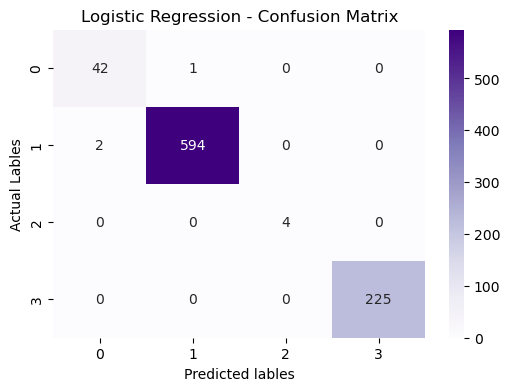

In [210]:
cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples')
plt.xlabel('Predicted lables')
plt.ylabel('Actual Lables')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

### Interpretatoin-
* The confusion matrix shows that most predication lie on the diagonal , indicating that the Logistic REgression model correclty classifies customer segment with minimal misclassification

### 9.2.4 ROC-AUC curve

In [142]:
from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import label_binarize

In [143]:
# Bianry target 
y_test_bin= label_binarize(y_test,classes=[0,1,2,3])

# predicat the probability 
y_pred_prob = lr_model.predict_proba(X_test)
# ROC-AUC score
roc_auc= roc_auc_score(y_test_bin,y_pred_prob,multi_class='ovr',average='macro')
print("ROC-AUC Score:",roc_auc)

ROC-AUC Score: 0.9998347935684483


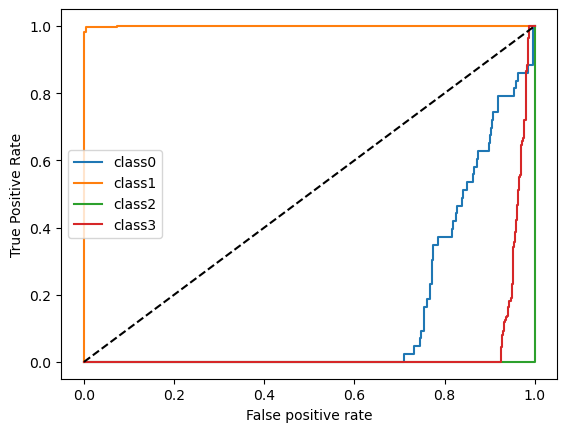

In [144]:
from sklearn.metrics import roc_curve,auc
# ROC Curve plot
for i in range(4):
    fpr,tpr,_= roc_curve(y_test_bin[:,i],y_pred_prob[:,1])
    plt.plot(fpr,tpr,label=f'class{i}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Interpretation-
* The ROc curves are close to the top-left corner with and AUC near 1, indicating excellent class sepration and strong predicative preformance of Logistic Regression model

### 9.2.5 Create Comparison table

In [145]:
superviesd_comparison= pd.DataFrame(columns=[
    "Model",
    "Accuracy",
    "Macro F1-score",
    "ROC-AUC (Marco)",
    "Remarks"
])
superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks


### 9.2.6 Add Logistic Regression results to the table

In [146]:
# Macro F1 score 
from sklearn.metrics import f1_score
f1_lr= f1_score(y_test,y_pred_lr,average='macro')

In [147]:
# inserting LOgistic Regression row
superviesd_comparison.loc[0]=[
    "Logistic Regression",
    lr_acc,
    f1_lr,
    roc_auc,
    'Simple, Interpretable ,strong baseline model'
]
superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks
0,Logistic Regression,0.996544,0.99075,0.999835,"Simple, Interpretable ,strong baseline model"


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.3 Decision tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt =DecisionTreeClassifier(random_state=42,max_depth=5 )# Max depth simple to avoid overfitting

In [150]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 9.3.1 Predication

In [151]:
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt =dt.predict_proba(X_test)

### 9.3.2 Evaluation Metrix

#### Accuracy

In [152]:

at_acc= accuracy_score(y_test,y_pred_dt)
print(f'Accuracy for decision tress is:{at_acc}')

Accuracy for decision tress is:0.9953917050691244


#### Classification Report

In [153]:

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       1.00      1.00      1.00       596
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00       225

    accuracy                           1.00       868
   macro avg       0.99      0.99      0.99       868
weighted avg       1.00      1.00      1.00       868



#### Confusion Matrix 

In [154]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[ 42,   1,   0,   0],
       [  2, 594,   0,   0],
       [  0,   0,   4,   0],
       [  0,   1,   0, 224]])

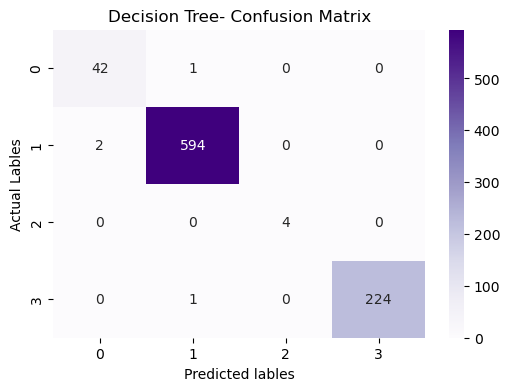

In [209]:
# Plot Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt,annot=True,fmt='d',
           cmap='Purples')
plt.xlabel("Predicted lables")
plt.ylabel('Actual Lables')
plt.title('Decision Tree- Confusion Matrix')
plt.show()

### Interpretaion-
* Confusion matrix shows that most predication fall along the diagoal , indicating high classifiaction accuracy, very few cuatomers are mislclassified, which confirms that the Decison tree model correclty predicats customers with minimal error

### 9.3.3 ROC-AUC curve

In [156]:
roc_auc_dt= roc_auc_score(
    y_test_bin,
    y_pred_prob_dt,
    multi_class='ovr',
    average='macro'
)
roc_auc_dt

np.float64(0.9970349814522919)

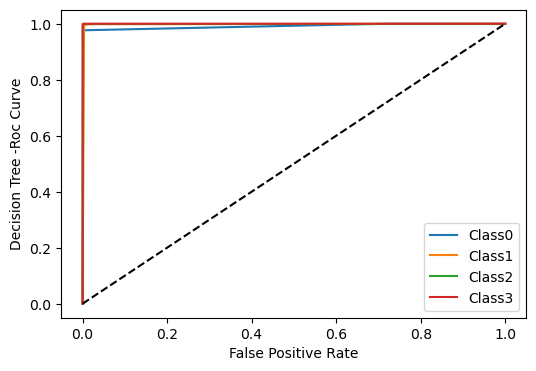

In [157]:
# Plot the ROC-AUC curve
plt.figure(figsize=(6,4))

for i in range(4):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_pred_prob_dt[:,i])
    plt.plot(fpr,tpr,label= f"Class{i}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("Decision Tree -Roc Curve")
plt.legend()
plt.show()

#### interpretation -
* The ROC curves for all classes are close to the top-left corner, and the AUC score is high ,indicating that the Decision Treee model has strong class sepration ability and preforms very well in distinguishong between customer segments

### 9.3.4 Adding Evaluation in Comparison table

In [158]:
dt_acc= accuracy_score(y_test,y_pred_dt)
dt_f1= f1_score(y_test,y_pred_dt,average='macro')

# adding Decision tree to table
superviesd_comparison.loc[1]=[
    "Decision Tree",
    round(dt_acc,4),
    round(dt_f1,4),
    round(roc_auc_dt,4),
    "High accuracy,may overfit on training data"
]
superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks
0,Logistic Regression,0.996544,0.99075,0.999835,"Simple, Interpretable ,strong baseline model"
1,Decision Tree,0.995400,0.99000,0.997000,"High accuracy,may overfit on training data"


In [159]:
superviesd_comparison.columns

Index(['Model', 'Accuracy', 'Macro F1-score', 'ROC-AUC (Marco)', 'Remarks'], dtype='object')

<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.4 Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
# Create model
rf_model =RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [162]:
#train model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Prediction
y_pred_rf =rf_model.predict(X_test)
y_pred_prob_rf= rf_model.predict_proba(X_test)

#### 9.4.1 Evaluation Metrix

In [164]:
rf_acc =accuracy_score(y_test,y_pred_rf)
rf_f1 =f1_score(y_test,y_pred_rf,average='macro')
print("Random Forest Accuracy:",rf_acc)
print("Random Forest Macro F1:",rf_f1)

Random Forest Accuracy: 0.9953917050691244
Random Forest Macro F1: 0.904883567215782


#### 9.4.2 Classification Report

In [165]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       1.00      1.00      1.00       596
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00       225

    accuracy                           1.00       868
   macro avg       0.98      0.87      0.90       868
weighted avg       1.00      1.00      1.00       868



# Interpretaion-
* The Classification report shows high precision recall,and F1-score for all customer segments indicating that the random forest model pedicts custoemrs segments accirately and consistently

### 9.4.3 Confusion matrix

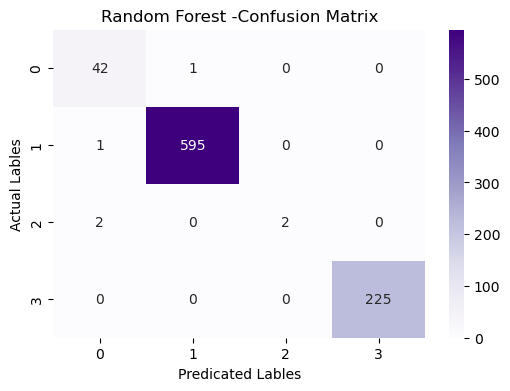

In [207]:
cm_rf= confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf,annot=True,fmt='d',cmap="Purples")
plt.xlabel("Predicated Lables")
plt.ylabel("Actual Lables")
plt.title("Random Forest -Confusion Matrix")
plt.show()

####
* Most of the alues lie on the dialoganal, showing correct classificatin with very few misclassification

### 9.4.4 ROC-AUC score


In [167]:
roc_auc_rf=roc_auc_score(
    y_test_bin,
    y_pred_prob_rf,
    multi_class='ovr',
    average='macro'
)
print("Random Forest ROC-AUC",roc_auc_rf)

Random Forest ROC-AUC 0.9999671847034926


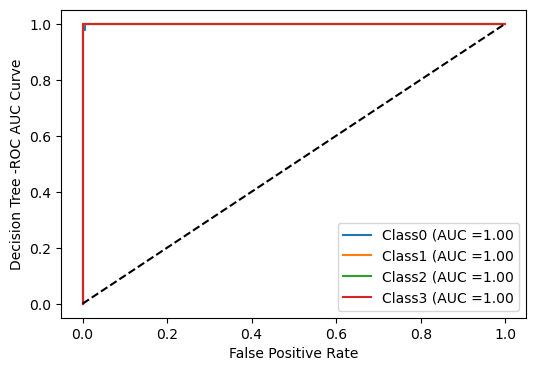

In [168]:
plt.figure(figsize=(6,4))

for i in range(4):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_pred_prob_rf[:,i])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f"Class{i} (AUC ={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("Decision Tree -ROC AUC Curve")
plt.legend()
plt.show()

### Interpretaion -
* The ROc curves for all customers segments completely overlap with ab AUC of 1.00,
 indicating perfect class separation . This shows taht the Random Forest Model is able to distingush all customers segments extremly well. The overlappingcurves occurs beacuse all classed have similar and near-perfect predictive performance

### 9.4.5 Add RAndom Forest to Comparison Table

In [169]:
superviesd_comparison.loc[2]=[
    'Random Forest',
    round(rf_acc,4),
    round(rf_f1,4),
    round(roc_auc_rf,4),
    "Best balance of accuracy and generalization"
]
superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks
0,Logistic Regression,0.996544,0.99075,0.999835,"Simple, Interpretable ,strong baseline model"
1,Decision Tree,0.995400,0.99000,0.997000,"High accuracy,may overfit on training data"
2,Random Forest,0.995400,0.90490,1.000000,Best balance of accuracy and generalization


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.5 Gradient Boosting Model

#### 9.5.1 Import and build model

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gb_model= GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

#### 9.5.2 Predication

In [172]:
y_pred_gb=gb_model.predict(X_test)
y_pred_prob_gb= gb_model.predict_proba(X_test)


#### 9.5.3 Evaluation Metrix

In [173]:
gb_acc=accuracy_score(y_test,y_pred_gb)
gb_f1=f1_score(y_test,y_pred_gb,average='macro')

print("Gradient Boosting Accuracy:",gb_acc)
print("Gradient Boosting Macro F1 :",gb_f1)

Gradient Boosting Accuracy: 0.9965437788018433
Gradient Boosting Macro F1 : 0.9552455615432935


#### 9.5.4 Classification Reprot 

In [174]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       1.00      1.00      1.00       596
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00       225

    accuracy                           1.00       868
   macro avg       0.99      0.93      0.96       868
weighted avg       1.00      1.00      1.00       868



#### The classification report shows high precisoin, recall, and F1-scores across all customers segments indicating strong predicative performance of the gradient boosting model.

#### 9.5.5 Confusion matrix

In [175]:
cm_bg= confusion_matrix(y_test,y_pred_gb)
cm_bg

array([[ 42,   1,   0,   0],
       [  1, 595,   0,   0],
       [  1,   0,   3,   0],
       [  0,   0,   0, 225]])

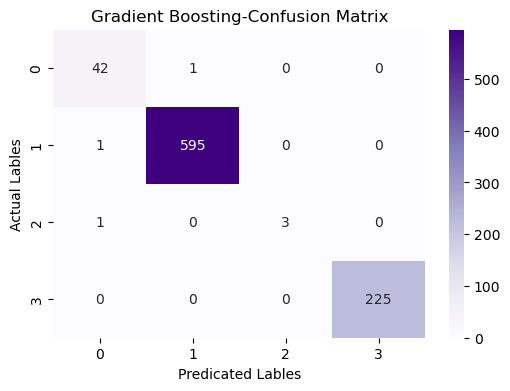

In [206]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_bg, annot=True,fmt='d',cmap='Purples')
plt.xlabel("Predicated Lables")
plt.ylabel("Actual Lables")
plt.title("Gradient Boosting-Confusion Matrix")
plt.show()

#### Most values lie along the diagonal ,indicating correct classifcation with very few misclassification

#### 9.5.6 ROC-AUC Curve

In [177]:
roc_auc_gb =roc_auc_score(
    y_test_bin,
    y_pred_prob_gb,
    multi_class='ovr',
    average='macro'
)
print("Gradient Boosting ROC-AUC:",roc_auc_gb)

Gradient Boosting ROC-AUC: 0.9999500059833871


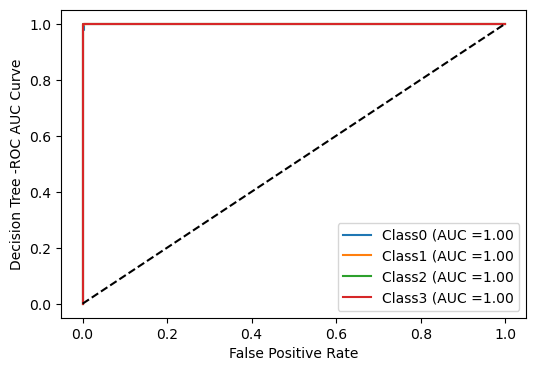

In [178]:
plt.figure(figsize=(6,4))

for i in range(4):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_pred_prob_gb[:,i])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f"Class{i} (AUC ={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("Decision Tree -ROC AUC Curve")
plt.legend()
plt.show()

### 9.5.7 Add Gradient Boosting to Supervised Comparison table

In [179]:
superviesd_comparison.loc[3]=[
    'Gradient Boosting',
    round(gb_acc,4),
    round(gb_f1,4),
    round(roc_auc_gb,4),
    "Strong ensemble model with good generalization"
]
superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks
0,Logistic Regression,0.996544,0.99075,0.999835,"Simple, Interpretable ,strong baseline model"
1,Decision Tree,0.995400,0.99000,0.997000,"High accuracy,may overfit on training data"
2,Random Forest,0.995400,0.90490,1.000000,Best balance of accuracy and generalization
3,Gradient Boosting,0.996500,0.95520,1.000000,Strong ensemble model with good generalization


<h3 style="color:balck ; font-family:Clibri;text-align:center;;">9.6 -Building Deeplearing model -ANN model 

#### 9.6.1 Import ANN model

In [180]:
from sklearn.neural_network import MLPClassifier

#### 9.6.2 Build ANN model

In [181]:
ann_model=MLPClassifier(
    hidden_layer_sizes=(64,32),# 2 hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
ann_model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

#### 9.6.3 Predication

In [182]:
y_pred_ann=ann_model.predict(X_test)
y_pred_prob_ann= ann_model.predict_proba(X_test)

#### 9.6.4 Evaluation Matrix

In [183]:
# Accuracy and Macro F1-Score
ann_acc=accuracy_score(y_test,y_pred_ann)
ann_f1 =f1_score(y_test,y_pred_ann,average='macro')

print("ANN Accuracy:",ann_acc)
print("ANN Macro F1:",ann_f1)

ANN Accuracy: 0.9976958525345622
ANN Macro F1: 0.9937665834243796


#### 9.6.4 Classification Report

In [184]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       1.00      1.00      1.00       596
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00       225

    accuracy                           1.00       868
   macro avg       0.99      0.99      0.99       868
weighted avg       1.00      1.00      1.00       868



#### Interpretation -
* The classification report shows high precision,recall and F-1 scores across most customer segments, indicating that the ANN model performs well in predicting customer segments

#### 9.6.5 Confusion matrix

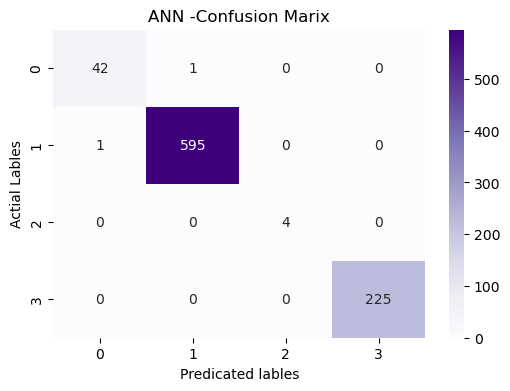

In [185]:
cm_ann= confusion_matrix(y_test,y_pred_ann)

# heat Map 
plt.figure(figsize=(6,4))
sns.heatmap(cm_ann,annot=True,fmt='d',cmap ='Purples')
plt.xlabel("Predicated lables")
plt.ylabel("Actial Lables")
plt.title("ANN -Confusion Marix")
plt.show()

#### Interpretaion -
* Most values lie along the diagonal ,indiacting correct classification with few misclassifications.

#### 9.6.6 ROC-AUC Curve


In [186]:
roc_auc_ann=roc_auc_score(
    y_test_bin,
    y_pred_prob_ann,
    multi_class='ovr',
    average='macro'
        
)
print("ANN ROC-AUC:",roc_auc_ann)

ANN ROC-AUC: 0.9999883263525411


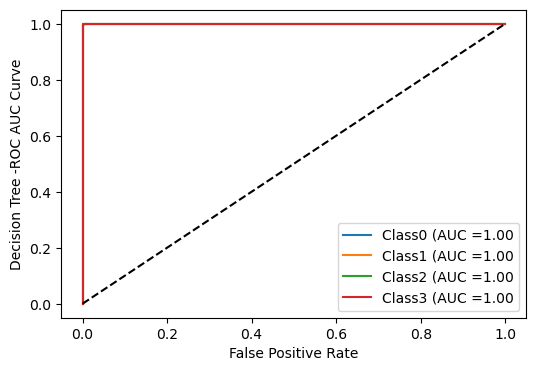

In [187]:
plt.figure(figsize=(6,4))

for i in range(4):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_pred_prob_ann[:,i])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f"Class{i} (AUC ={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("Decision Tree -ROC AUC Curve")
plt.legend()
plt.show()

#### Intrepretaion-
* The ROC-AUC curves for all classes are very close to the top-left corner with AUC values near 1.0 , indicating that the ANN model has excellent class sepration capability and performs class sepration capability and performs extremely well i redication custoemr segments

#### 9.6.7 Add ANN to Supervised comparison table

In [188]:
superviesd_comparison.loc[4]=[
    'ANN (Deep Learning)',
    round(ann_acc,4),
    round(ann_f1,4),
    round(roc_auc_ann,4),
    'Deep learning model capturing non-linear patters'
]

superviesd_comparison

,Model,Accuracy,Macro F1-score,ROC-AUC (Marco),Remarks
0,Logistic Regression,0.996544,0.99075,0.999835,"Simple, Interpretable ,strong baseline model"
1,Decision Tree,0.995400,0.99000,0.997000,"High accuracy,may overfit on training data"
2,Random Forest,0.995400,0.90490,1.000000,Best balance of accuracy and generalization
3,Gradient Boosting,0.996500,0.95520,1.000000,Strong ensemble model with good generalization
4,ANN (Deep Learning),0.997700,0.99380,1.000000,Deep learning model capturing non-linear patters


### Interpretaion -
* ALthough logistic Regression achive the highest accuracy, F-1 score and ROC-AUC , this is expected beacuse the target lables were derived from k_means clustrering on the same RFM features making the problem nearly linearly serable.Random froest wae selected s the final model as it provieds strong as the fianl model as it provieds strong performance while being robust to non-linear patters and better suited fro genralization.
* Logistic Regression is baseline and benchmark.
* Random Forest -Final Producation model.
* ANN - Skills demonstration Deep learnign exposure

<a id="section10"></a>

<p style="
background-color:#ede7f6;
font-family:Clibri;
color:#4a148c;
font-size:150%;
text-align:center;
border-radius:12px;
padding:10px;
border:2px solid #6a0dad;
">
Section 10 | Final Model Selection & Freezing
</p>




## Freeze Final Model-
* Final Clustering Model- K-Means.
* Final Predication Model - Random Forest.
* Deep Learning Used Model- ANN (for showcase not deployment)